In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np


In [ ]:
from PIL import Image

#original = Image.open('image.jpg')

#width, height = original.size

#wid = int(width / 2)

#imghalf = original.crop((0, 0, wid, height))

#imglast = original.crop((wid, 0, width, height ))

#img.save()

In [218]:
input_dir = "rim/image/"
target_dir = "rim/label/"

input_img_RIM = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
        
    ]
)
target_img_RIM = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

In [214]:
print(len(input_img_RIM))

2


In [219]:
print(input_img_RIM[0])
print(target_img_RIM[0])

rim/image/drishtiGS_002.png
rim/label/G-1-L-Cup-Avg.png


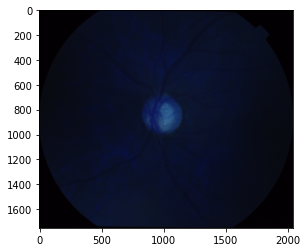

In [215]:
img = cv2.imread(input_img_RIM[0])
plt.imshow(img, cmap='gray')

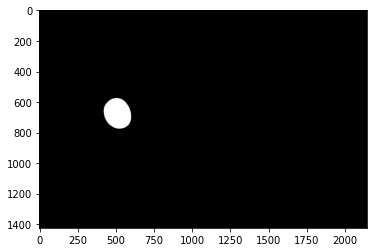

In [216]:
img2 = cv2.imread(target_img_RIM[0])
plt.imshow(img2, cmap='gray')

In [210]:
print(img.shape)
print(img2.shape)

(1752, 2045, 3)
(1424, 980, 3)


In [ ]:
cont = 1
for x in range(len(input_img_RIM)):
  original = Image.open(input_img_RIM[x])
  original_Mask = Image.open(target_img_RIM[x])
  width, height = original.size
  if (width not 2144):
    wid = 1500
    h = 1424
    x = 520
  else:
    wid = width/2
    x = 0
  imghalf = original.crop((x, 0, wid, h))
  imghalf_Mask = original_Mask.crop((x, 0, wid, h))  
  imghalf.save('data/train/image/Rim' +str(cont)+'.png')
  imghalf_Mask.save('data/train/label/Rim' +str(cont)+'.png')
  cont = cont+1

In [ ]:
##Teste
input_dire = "data/train/image/"
target_dire = "data/train/label/"
img_size = (256, 256)
num_classes = 1
batch_size = 8

input_img_paths = sorted(
    [
        os.path.join(input_dire, fname)
        for fname in os.listdir(input_dire)
        if fname.endswith(".png")
        
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dire, fname)
        for fname in os.listdir(target_dire)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))


Number of samples: 11


In [ ]:
for img in os.listdir(input_dire):
  os.remove(input_dire+"/"+img)

for img in os.listdir(target_dire):
  os.remove(target_dire+"/"+img)


In [ ]:
print(input_img_paths[0])

data/train/image/Rim1.png


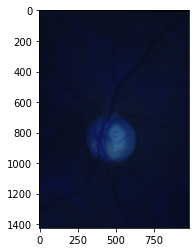

In [ ]:
img2 = cv2.imread(input_img_paths[0])
plt.imshow(img2, cmap='gray')

In [ ]:
training_images = []
masks = []
for x in range(len(input_img_paths)):
  img = cv2.imread(input_img_paths[x], cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (512,512))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  mask = cv2.imread(target_img_paths[x]) 
  #mask = cv2.resize(mask, (256,256))
  hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)
  thresh1 = cv2.threshold(s, 92, 255, cv2.THRESH_BINARY)[1]

  # threshold value image and invert
  thresh2 = cv2.threshold(v, 128, 255, cv2.THRESH_BINARY)[1]
  thresh2 = 255 - thresh2

  # combine the two threshold images as a mask
  mask = cv2.add(thresh1,thresh2)
  rmask = cv2.bitwise_not(mask)
  rmask = cv2.resize(rmask, (512,512))
  training_images.append(img)
  masks.append(rmask)

training_images = np.array(training_images)
masks = np.array(masks)

training_images = training_images/255.0
masks = masks/255.0


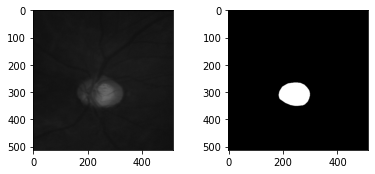

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
#ax.imshow(np.reshape(X[0], (256, 256)), cmap="gray")
ax.imshow(training_images[0], cmap="gray")
ax = fig.add_subplot(1, 2, 2)
ax.imshow(masks[0], cmap="gray")

